# Final Project DSC Unipa Afiful Fuad

In [68]:
import pandas as pd
data = pd.read_csv('dataR2.csv')
data.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [69]:
data.shape

(116, 10)

In [70]:
data.Classification.value_counts()

2    64
1    52
Name: Classification, dtype: int64

In [71]:
X = data.iloc[:, :-1]
y = data['Classification']
print(X.shape)
print(y.shape)

(116, 9)
(116,)


In [72]:
from imblearn.over_sampling import SMOTE 
smote = SMOTE(random_state=2021, n_jobs=-1, k_neighbors=5)
smote.fit(X, y)
X_smote, y_smote = smote.fit_resample(X, y)
print(X_smote.shape)
print(y_smote.shape)

(128, 9)
(128,)


In [73]:
df = X_smote
df['Classification'] = y_smote
df

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707000,0.467409,8.807100,9.702400,7.995850,417.114000,1
1,83,20.690495,92,3.115000,0.706897,8.843800,5.429285,4.064050,468.786000,1
2,82,23.124670,91,4.498000,1.009651,17.939300,22.432040,9.277150,554.697000,1
3,68,21.367521,77,3.226000,0.612725,9.882700,7.169560,12.766000,928.220000,1
4,86,21.111111,92,3.549000,0.805386,6.699400,4.819240,10.576350,773.920000,1
...,...,...,...,...,...,...,...,...,...,...
123,67,26.132401,84,7.176309,1.658179,30.690012,7.288320,15.832726,907.917333,1
124,53,34.765047,78,5.458583,1.061167,15.086143,6.343775,16.364898,596.748967,1
125,36,32.844141,81,6.056342,1.210404,11.432341,5.906001,14.160601,570.119494,1
126,34,23.225344,77,5.740654,1.095994,22.323484,20.997061,7.692704,168.417977,1


<AxesSubplot:>

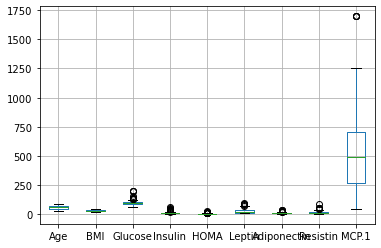

In [74]:
df.boxplot(["Age","BMI","Glucose","Insulin","HOMA","Leptin","Adiponectin","Resistin","MCP.1"])

In [75]:
import numpy as np
from scipy import stats

z = np.abs(stats.zscore(df._get_numeric_data()))
outlier = df[(z < 3).all(axis = 1)]
print(outlier.shape)
print(z)

pd_outlier = pd.DataFrame([])
pd_outlier["Notes"] = ["Not Outlier","Outlier"]
pd_outlier["Number of Observations"] = [outlier.shape[0], df.shape[0]-outlier.shape[0]]
pd_outlier

(114, 10)
[[0.56929919 0.84680044 1.21093054 ... 0.53330454 0.35986089 1.        ]
 [1.61058146 1.40940153 0.20414566 ... 0.86460695 0.20703552 1.        ]
 [1.54829916 0.92195988 0.24990861 ... 0.42533929 0.0470553  1.        ]
 ...
 [1.31668684 1.02435586 0.7075381  ... 0.01384862 0.09266895 1.        ]
 [1.44125145 0.90180001 0.8905899  ... 0.55884828 1.09540554 1.        ]
 [1.11232303 1.18326604 0.8905899  ... 0.12649622 1.48090183 1.        ]]


,Notes,Number of Observations
0,Not Outlier,114
1,Outlier,14


<AxesSubplot:>

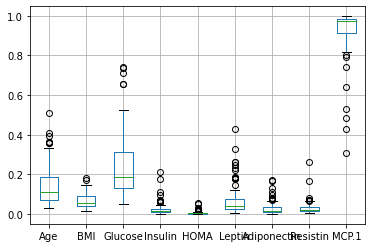

In [76]:
from sklearn import preprocessing

features = df.iloc[:,0:9]
features_normalized = preprocessing.normalize(features, norm = 'l2')
features_normalized = pd.DataFrame(features_normalized, columns = features.columns.tolist())
features_normalized

features_normalized.boxplot(["Age","BMI","Glucose","Insulin","HOMA","Leptin","Adiponectin","Resistin","MCP.1"])

In [77]:
z = np.abs(stats.zscore(features_normalized._get_numeric_data()))
outlier = features_normalized[(z < 3).all(axis = 1)]
print(outlier.shape)

pd_outlier = pd.DataFrame([])
pd_outlier["Notes"] = ["Not Outlier","Outlier"]
pd_outlier["Number of Observations"] = [outlier.shape[0], features_normalized.shape[0]-outlier.shape[0]]
pd_outlier

(117, 9)


,Notes,Number of Observations
0,Not Outlier,117
1,Outlier,11


In [78]:
from sklearn.preprocessing import MinMaxScaler, PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
X_pt = pt.fit_transform(features_normalized)
X_pt

mm = MinMaxScaler()
X_scaled = mm.fit_transform(X_pt)
X_scaled.shape
X_scaled

array([[0.45608505, 0.44802889, 0.41760385, ..., 0.48980353, 0.34524579,
        0.8065891 ],
       [0.64191502, 0.3309261 , 0.48271628, ..., 0.25311717, 0.09681973,
        0.70809845],
       [0.56564457, 0.31026298, 0.40590295, ..., 0.7040114 , 0.29377843,
        0.77679847],
       ...,
       [0.22008969, 0.46267863, 0.34837205, ..., 0.22873231, 0.45136162,
        0.88004411],
       [0.65639993, 0.83361172, 0.81231092, ..., 0.97065796, 0.65784056,
        0.26152931],
       [0.2716107 , 0.07470079, 0.10782616, ..., 0.1231193 , 0.19989141,
        0.96236429]])

In [79]:
X_selected = pd.DataFrame(X_scaled, columns=X.columns)

x1 = X_selected
x1['Classification'] = y_smote
x1

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,0.456085,0.448029,0.417604,0.179266,0.114094,0.206043,0.489804,0.345246,0.806589,1
1,0.641915,0.330926,0.482716,0.181627,0.163261,0.176264,0.253117,0.096820,0.708098,1
2,0.565645,0.310263,0.405903,0.229444,0.204254,0.325984,0.704011,0.293778,0.776798,1
3,0.277036,0.101439,0.144376,0.076804,0.050139,0.074591,0.160963,0.233833,0.953676,1
4,0.444720,0.153378,0.274651,0.116186,0.104348,0.045277,0.117207,0.229494,0.885409,1
...,...,...,...,...,...,...,...,...,...,...
123,0.279194,0.173673,0.181636,0.227562,0.209054,0.346092,0.168965,0.315340,0.937668,1
124,0.349588,0.467780,0.312934,0.263428,0.201586,0.255628,0.235379,0.492356,0.874571,1
125,0.220090,0.462679,0.348372,0.305705,0.243546,0.195449,0.228732,0.451362,0.880044,1
126,0.656400,0.833612,0.812311,0.680461,0.571917,0.802301,0.970658,0.657841,0.261529,1


<AxesSubplot:>

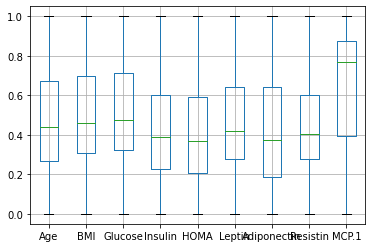

In [80]:
x1.boxplot(["Age","BMI","Glucose","Insulin","HOMA","Leptin","Adiponectin","Resistin","MCP.1"])

In [81]:
z = np.abs(stats.zscore(x1._get_numeric_data()))
outlier = x1[(z < 3).all(axis = 1)]
print(outlier.shape)

pd_outlier = pd.DataFrame([])
pd_outlier["Notes"] = ["Not Outlier","Outlier"]
pd_outlier["Number of Observations"] = [outlier.shape[0], x1.shape[0]-outlier.shape[0]]
pd_outlier

(128, 10)


,Notes,Number of Observations
0,Not Outlier,128
1,Outlier,0


In [82]:
x = x1.iloc[:, :-1]
y = x1.iloc[:,9]

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

#scoring = make_scorer(accuracy_score)
#scoring = make_scorer(precision_score)
#scoring = make_scorer(precision_score, average = 'macro')
#scoring = make_scorer(recall_score, average = 'macro')
scoring = make_scorer(f1_score, average = 'micro')

clf = KNeighborsClassifier(n_neighbors = 3, p = 2)
scores = cross_val_score(clf, x, y, cv = 10, scoring = scoring)
scores

print("Cross Validation Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Cross Validation Score: 0.65 (+/- 0.24)


In [83]:
le = preprocessing.LabelEncoder()
le.fit(y)
y_encoded = le.transform(y)

print('y: ', y)
print('\n')
print('y_encoded: ', y_encoded)

y:  0      1
1      1
2      1
3      1
4      1
      ..
123    1
124    1
125    1
126    1
127    1
Name: Classification, Length: 128, dtype: int64


y_encoded:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]


In [84]:
from sklearn.model_selection import KFold, StratifiedKFold
import numpy as np

# Print the splitting results using K-Fold
print("Splitting Results using K-Fold Cross Validation")
kf = KFold(n_splits = 5, random_state = None, shuffle = False)
for train_index, test_index in kf.split(x):
    print('Train -  {}   |   Test -  {}'.format(np.bincount(y_encoded[train_index]), np.bincount(y_encoded[test_index])))

print("\n")

# Print the splitting results using Stratified K-Fold
print("Splitting Results using Stratified K-Fold Cross Validation")
skf = StratifiedKFold(n_splits = 5, random_state = None, shuffle = False)
for train_index, test_index in skf.split(x, y_encoded):
    print('Train -  {}   |   Test -  {}'.format(np.bincount(y_encoded[train_index]), np.bincount(y_encoded[test_index])))

Splitting Results using K-Fold Cross Validation
Train -  [38 64]   |   Test -  [26]
Train -  [38 64]   |   Test -  [26]
Train -  [64 38]   |   Test -  [ 0 26]
Train -  [64 39]   |   Test -  [ 0 25]
Train -  [52 51]   |   Test -  [12 13]


Splitting Results using Stratified K-Fold Cross Validation
Train -  [51 51]   |   Test -  [13 13]
Train -  [51 51]   |   Test -  [13 13]
Train -  [51 51]   |   Test -  [13 13]
Train -  [51 52]   |   Test -  [13 12]
Train -  [52 51]   |   Test -  [12 13]


In [85]:
from sklearn.metrics import confusion_matrix, accuracy_score

accuracy_train = []
accuracy_test = []

#for train_index, test_index in kf.split(x): # To perform K-Fold Cross Validation
for train_index, test_index in skf.split(x, y): # To perform Stratified K-Fold Cross Validation
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    print('Train -  {}   |   Test -  {}\n'.format(np.bincount(y_encoded[train_index]), np.bincount(y_encoded[test_index])))
    
    clf = KNeighborsClassifier(n_neighbors = 5, p = 1)
    clf.fit(x_train, y_train)
    y_fit = clf.predict(x_train)
    y_predict = clf.predict(x_test)
 
    cm_test = confusion_matrix(y_predict, y_test)
    accuracy_train_fold = accuracy_score(y_train, y_fit)
    accuracy_train.append(accuracy_train_fold)
    accuracy_test_fold = accuracy_score(y_test, y_predict)
    accuracy_test.append(accuracy_test_fold)
    
    print('Train Index -  {} \n\nTest Index -  {}\n'.format(train_index, test_index))
    print("Accuracy Train:", accuracy_train_fold)
    print("Accuracy Test :", accuracy_test_fold)
    print("Confusion Matrix Test:", "\n", cm_test)
    print("\n")

print("Average Accuracy Train :", np.mean(accuracy_train))
print("Average Accuracy Test :", np.mean(accuracy_test))

Train -  [51 51]   |   Test -  [13 13]

Train Index -  [ 13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30
  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48
  49  50  51  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79
  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115
 116 117 118 119 120 121 122 123 124 125 126 127] 

Test Index -  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 52 53 54 55 56 57 58 59 60 61 62
 63 64]

Accuracy Train: 0.7156862745098039
Accuracy Test : 0.8076923076923077
Confusion Matrix Test: 
 [[11  3]
 [ 2 10]]


Train -  [51 51]   |   Test -  [13 13]

Train Index -  [  0   1   2   3   4   5   6   7   8   9  10  11  12  26  27  28  29  30
  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48
  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  78  79
  80  81  82  83  84  85  86  87  88  89  